<h1>Problem set 1</h1>
<p><b>Sergio Villamarin</b></p>

<h3>P1</h3>
<p>The set of defining equations for this problem are:</p>

$$q_s(x,0)=q_s(x)=q_{s_0}+a\eta(x)$$
$$\eta(x,0)=b\sin(kx)$$
$$\frac{\partial \eta}{\partial t}=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}$$

#### 1.1
Since $\eta $ is the bed elevation with respect to a datum, the value of $b$ corresponds to the amplitude of the $\sin$ wave that defines the bed, the height of the dunes. 

Similarly, $k$ affects the frequency $f$ of the wave shape as $f=2\pi k$, i.e. it makes dunes more spiky or flat. 


#### 1.2
From the three defining equations we can find a closed expresion for $\frac{\partial \eta}{\partial t}$

$$
\begin{align*}
    \frac{\partial \eta}{\partial t}(x,0)&=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}(x,0)\\
    &=-\frac{1}{\varepsilon_0}\frac{\partial}{\partial x}\left(q_{s_0}+a\eta\right)(x,0) \\
    &=-\frac{a}{\varepsilon_0}\frac{\partial \eta}{\partial x}(x,0) \\
    &=-\frac{a}{\varepsilon_0}\frac{\partial}{\partial x}\left( b\sin(kx) \right)\\
    &=-\frac{a}{\varepsilon_0}bk\cos(kx)\\
    &=-\frac{0.44}{\varepsilon_0}\cos(2x)    
\end{align*}
$$

A plot of the topography $\eta$ with the sediment flux $q_s$ on it is shown below.

In [14]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [15]:
#sediment flow parameters
q0=0.22; a=1.1; 
#bed parameters
b=0.2; k=2.0; eps=0.5; #bed porosity not given so I'll assume 0.5
#space domain
xdelta=0.1;
start=0.0; end=4.0;
x=np.arange(start, end+xdelta,xdelta)
#time domain
tdelta=[0.05,0.1,0.15]
#setup
n=[];
n.append(b*np.sin(k*x));

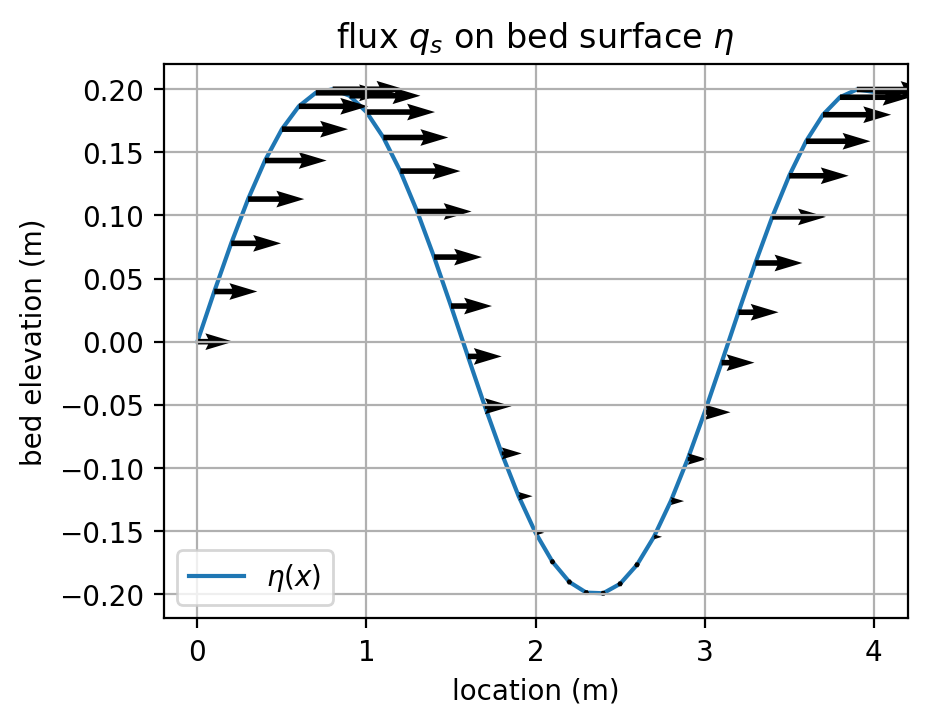

In [21]:
#now with a plot of the flow on top
plt.style.use("default");
fig2, ax2= plt.subplots(figsize=[4.8, 3.6],dpi=200);
ax2.plot(x,n[0],label="$\eta (x)$",zorder=0);
y_dummy=x*0;
q=q0+a*n[0];
ax2.quiver(x,n[0],q,y_dummy,zorder=1);

# style of the plot
ax2.set_xlabel("location (m)");
ax2.set_ylabel("bed elevation (m)");
ax2.set_title("flux $q_s$ on bed surface $\eta$");
ax2.legend();
ax2.grid(True);
plt.show();

#### 1.3
Since I want the bed elevation evolution I need a time differential for $\eta_s$, which I got on part 2, and apply some numerical method. Using euler's method at $t=0$ I get:


$$
\begin{align*}
    \frac{\partial q_s}{\partial t}(x,0)&=\frac{\partial}{\partial t}\left(q_{s_0}+a\eta\right)(x,0) \\
    &=a\frac{\partial \eta}{\partial t}(x,0) \\
    &=-\frac{a^2}{\varepsilon_0}bk\cos(kx) \\
\end{align*}
$$


Using euler's method to solve in the time dimension at $t=0$ we get
$$
\begin{align*}
    q_s(x,0+\Delta t)&\approx q_s(x,0)+\Delta t \frac{\partial q_s}{\partial t}(x,0)\\
    &=q_{s_0}+a\eta(x,0)-\Delta t\frac{a^2}{\varepsilon_0}bk\cos(kx) \\
    &=q_{s_0}+ab\sin(kx)-\Delta t\frac{a^2bk}{\varepsilon_0}\cos(kx)
\end{align*}
$$

$$
\begin{align*}
    \eta(x,0+\Delta t)&\approx \eta(x,0)+\Delta t \frac{\partial \eta}{\partial t}(x,0)\\
    &=b\sin(kx)-\Delta t\frac{a}{\varepsilon_0}bk\cos(kx)
\end{align*}
$$

A plot for the evolution of the bed is shown below

<Figure size 640x480 with 0 Axes>

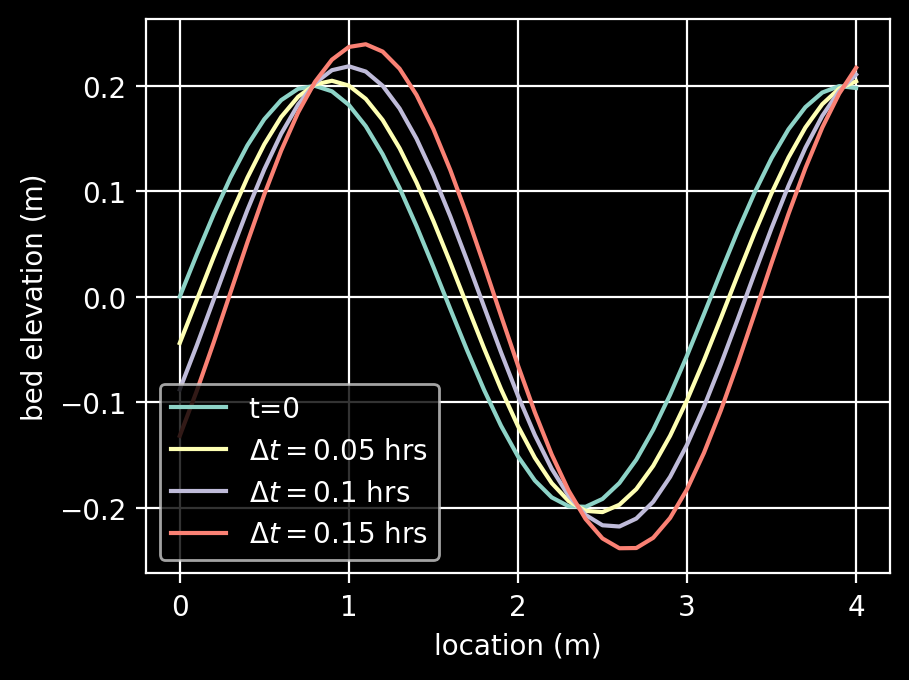

In [17]:
#clear figures
plt.cla(); plt.clf();
plt.style.use("dark_background");
fig, ax= plt.subplots(figsize=[4.8, 3.6],dpi=200);
# initial conditions plot
ax.plot(x,n[0],label="t=0");
# different time delta plots
for i in range(len(tdelta)):
    n.append( b*np.sin(k*x)-tdelta[i]*(a*b*k/eps)*np.cos(k*x) );
    ax.plot(x,n[i+1],label="$\Delta t=$"+str(tdelta[i])+" hrs");
# style of the plot
ax.set_xlabel("location (m)");
ax.set_ylabel("bed elevation (m)");
ax.legend();
ax.grid(True);
plt.show();


#### 1.4
I can't do a sketch here... but I can do this. Call the new function $q_2(x,t)$ and its corresponding bed elevation $\eta_2$. Then we want to relate the original sediment flux and dynamics to the new ones.

Then the system defined equations are:


$$q_2(x,0)=q_2(x)=q_{s_0}+a\eta_2(x-l)=q_2(x-l)=q_s(x-l,0)$$
$$\eta_2(x,0)=b\sin(kx)$$
$$\frac{\partial \eta_2}{\partial t}=-\frac{1}{\varepsilon_0}\frac{\partial q_2}{\partial x}$$


from the last relationship and the original Exner equation we get  
$$
\begin{align*}
    \frac{\partial \eta_2}{\partial t}(x,0)&=-\frac{1}{\varepsilon_0}\frac{\partial q_2}{\partial x}(x,0) \\
    &=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}(x-l,0) \\
    &=\frac{\partial \eta}{\partial t}(x-l,0) \\
    &=\frac{\partial \eta_2}{\partial t}(x-l,0)
\end{align*}
$$

#### 1.4
Translations don't change slopes, i.e. they don't change derivatives, meaning that the only change in the original defining equations is a lag that displaces the sediment flux $q_s$ on the bed $l$ meters to the right (positive direction) of the current location.

In [18]:
#sediment flow parameters
q0=0.22; a=1.1;
#bed shape parameters
b=0.2; k=2.0; l=1; eps=0.5; #bed porosity not given so I'll assume 0.5
#space domain
xdelta=0.1;
start=0.0; end=4.0;
x=np.arange(start, end+xdelta,xdelta)
#time domain
tdelta=[0.05,0.1,0.15]
#setup
n=[];
n.append(b*np.sin(k*(x)));

From the plot of the new flow below we can see that the flux of sediment will pull from the dunes and filling the holes making them flatter.

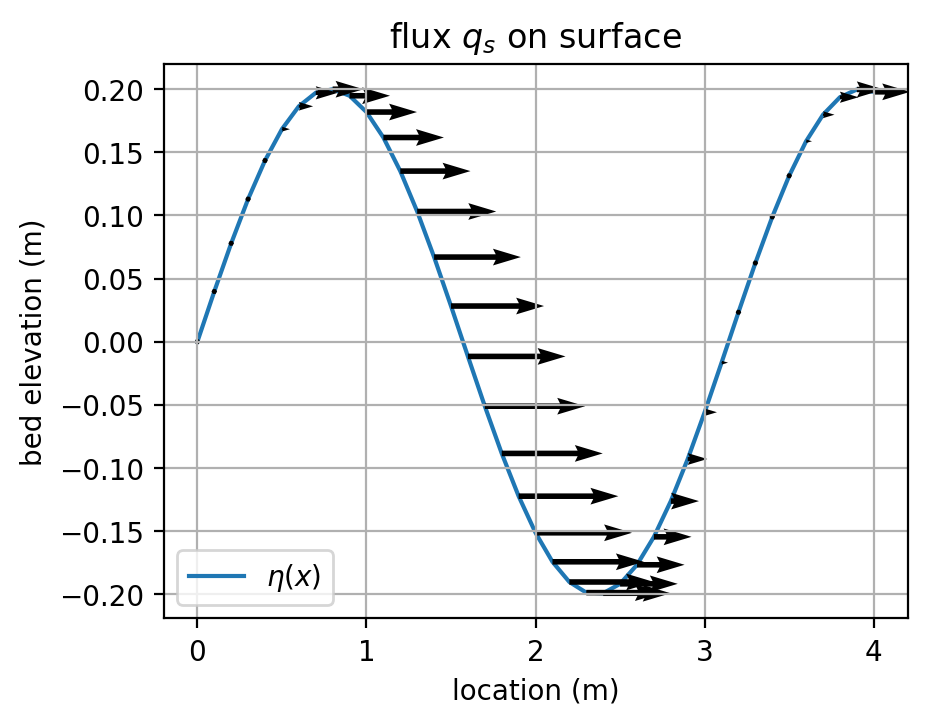

In [19]:
#now with a plot of the flow on top
plt.style.use("default");
fig2, ax2= plt.subplots(figsize=[4.8, 3.6],dpi=200);
ax2.plot(x,n[0],label="$\eta (x)$",zorder=0);
y_dummy=x*0;
q=q0+a*(b*np.sin(k*(x-l)));
ax2.quiver(x,n[0],q,y_dummy,zorder=1);

# style of the plot
ax2.set_xlabel("location (m)");
ax2.set_ylabel("bed elevation (m)");
ax2.set_title("flux $q_s$ on surface");
ax2.legend();
ax2.grid(True);
plt.show();

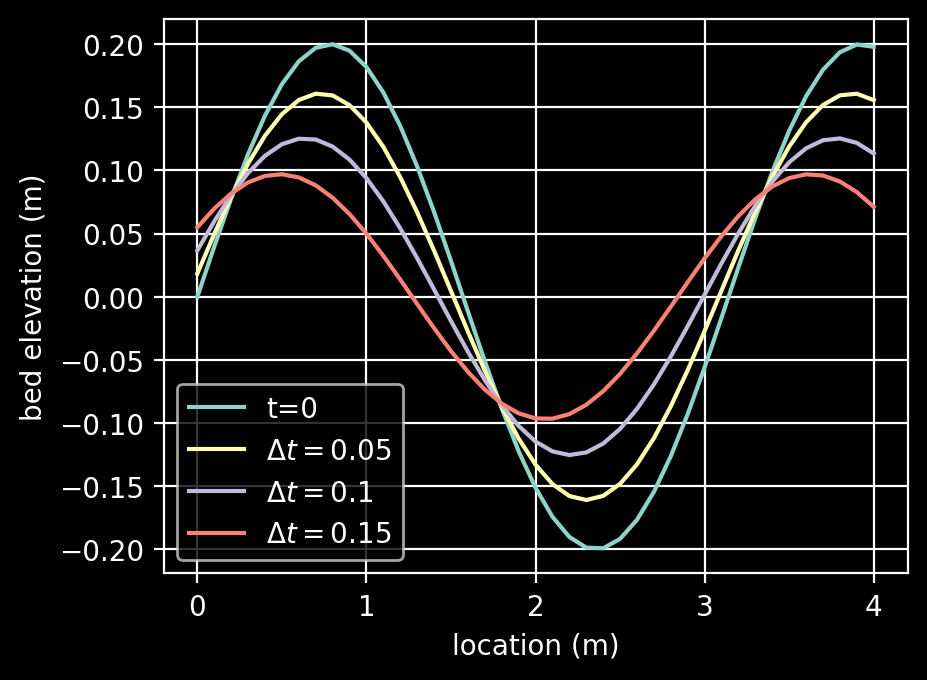

In [20]:
plt.style.use("dark_background");
fig, ax= plt.subplots(figsize=[4.8, 3.6],dpi=200);
# initial conditions plot
ax.plot(x,n[0],label="t=0");
# different time delta plots
for i in range(len(tdelta)):
    n.append( b*np.sin(k*(x))-tdelta[i]*(a*b*k/eps)*np.cos(k*(x-l)) );
    ax.plot(x,n[i+1],label="$\Delta t=$"+str(tdelta[i]));
# style of the plot
ax.set_xlabel("location (m)");
ax.set_ylabel("bed elevation (m)");
ax.legend();
ax.grid(True);
plt.show();


### P2

I'm gonna sketch in here if that's okay

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;

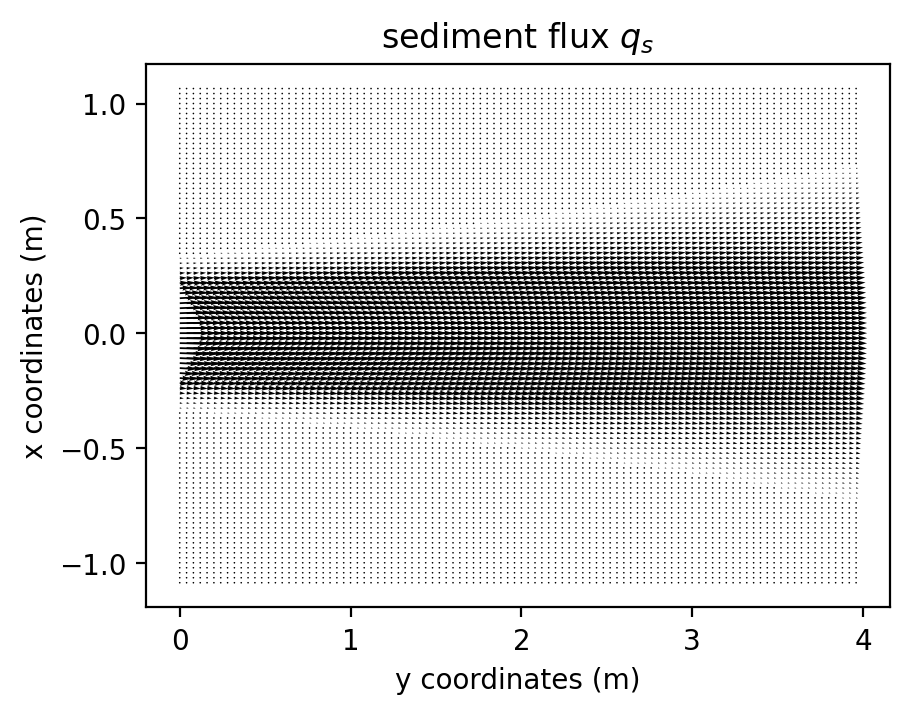

In [8]:
#Space parameters
L=4; xdelta=L/100; ydelta=0.1*L*math.exp(1)/50;
xrange=np.arange(0,L,xdelta);
yrange=np.arange(-0.1*L*math.exp(1),0.1*L*math.exp(1),ydelta);
omega=0.1*L*np.exp(xrange/L);
#grid
x,y=np.meshgrid(xrange, yrange);
#flux parameters
q0=0.2;
qx=x*0;
qy=y*0;
#defining the flow
for i in range(len(xrange)):
    for j in range(len(yrange)):
        # qx and qy are only defined inside the region -omega(x)<y<omega(x)
        if (-omega[i]<y[j,i])and(y[j,i]<omega[i]):
            qx[j,i]=q0*math.exp(-(x[j,i]/L))*math.exp(-(2*y[j,i]/omega[i] )**2);
            qy[j,i]=0.1*q0*math.exp(-(2*y[j,i]/omega[i] )**2)*math.sin(math.pi*y[j,i]/(2*omega[i]));
            
#Sketch the vector field
plt.quiver(x,y,qx,qy,scale=5);
fig = plt.gcf();
fig.set_dpi(200);
fig.set_size_inches([4.8,3.6]);
ax=plt.gca();
ax.set_xlabel("y coordinates (m)");
ax.set_ylabel("x coordinates (m)");
ax.set_title("sediment flux $q_s$")
plt.show();

#### 2.1
- $L$ is a scaling parameter to keep $0<x/L<1$ and additionally it scales $\omega (x)$ to be larger or smaller.
- $\omega(x)$ is also for scaling so that $-\frac{\pi}{2}<\frac{\pi y}{2\omega}<\frac{\pi}{2}$ and also $0<\left(\frac{2y}{\omega}\right)^2<4$.

This means that the shape will remain similar regarless of the parameters and since only $\omega$ changes as $L$ does (and $-\omega<y<\omega$), then the only change is the scaling of the length of the channel.

#### 2.2
This could be a channel approaching its base level as the sedimend flux is both slowing down and spreading. The next graph on erosion deposition also shows how it is eroding the banks and depositing towards the source and center of the channel.

#### 2.3
Using exner equation I get

$$
\begin{align*}
    \frac{\partial \eta}{\partial t} 
    &=\frac{1}{\varepsilon_0}\nabla \cdot q_s    \\
    &=\frac{1}{\varepsilon_0}\left( \frac{\partial q_{xs}}{\partial x}+ \frac{\partial q_{ys}}{\partial y}\right)     
\end{align*}
$$

Now to simplify some of the calculations we find $\frac{\partial \omega}{\partial x}$ as:
$$
\begin{align*}
    \frac{\partial \omega}{\partial x}
    &=\frac{\partial}{\partial x}\left(0.1Le^{x/L}\right) \\
    &=(0.1Le^{x/L})(\frac{1}{L}) \\
    &= 0.1e^{x/L}=\omega/L
    
\end{align*}
$$

and now I use my whiteboard to compute derivatives because it seems like too much work to do it here. From that I get
$$
\begin{align*}
    \frac{\partial q_{xs}}{\partial x}
    &=\frac{q_{xs}}{L} \left( 8\left(\frac{y}{\omega}\right)^2-1 \right) \\
    \frac{\partial q_{ys}}{\partial x}
    &=\frac{q_{ys}}{\omega} \left( \frac{\pi}{2}\cot(\frac{\pi y}{2\omega}) - \frac{8y}{\omega} \right)\\
    
\end{align*}
$$

and I could plug this into the exner equation above but that would just look messy, so I'll just use these for my calculations and to graph $\frac{\partial \eta}{\partial t}$ below (no units were given so I'll just assume meters and seconds to contextualize)

<ipython-input-9-4cd031b422ae>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = plt.pcolormesh(x, y, dn, cmap="Spectral",norm=colorsplit);


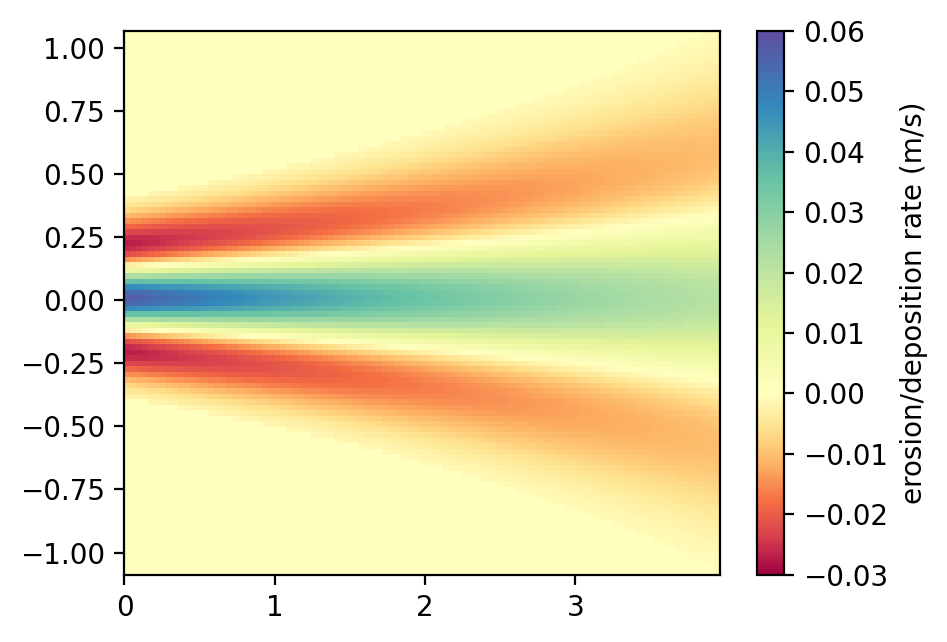

In [9]:
from matplotlib import colors
#Bed parameters
eps=0.5;
#partial derivatives for exner
inv_omega=np.reciprocal(omega);
dqx=-(qx/L)*(1-8*(y*y*inv_omega*inv_omega));
dqy=qy*( -8*y*inv_omega*inv_omega + (np.pi/2)*inv_omega*np.reciprocal(np.tan( (np.pi/2)*y*inv_omega )) );
#erosion/deposition at time 0
dn=(dqx+dqy)/eps;
#color map dn/dt for deposition / erosion
colorsplit=colors.TwoSlopeNorm(0., -0.03, 0.06);
plot = plt.pcolormesh(x, y, dn, cmap="Spectral",norm=colorsplit);
fig = plt.gcf();
fig.set_dpi(200);
fig.set_size_inches([4.8,3.6]);
colorbar=plt.colorbar(plot);
ax=plt.gca();
colorbar.ax.set_ylabel("erosion/deposition rate (m/s)");
plt.show();


### P3
I'll start by bringing up the velocity data here and ploting the velocities as a function of time. The slope of the dashed lines are going to be our accelerations on the next step.

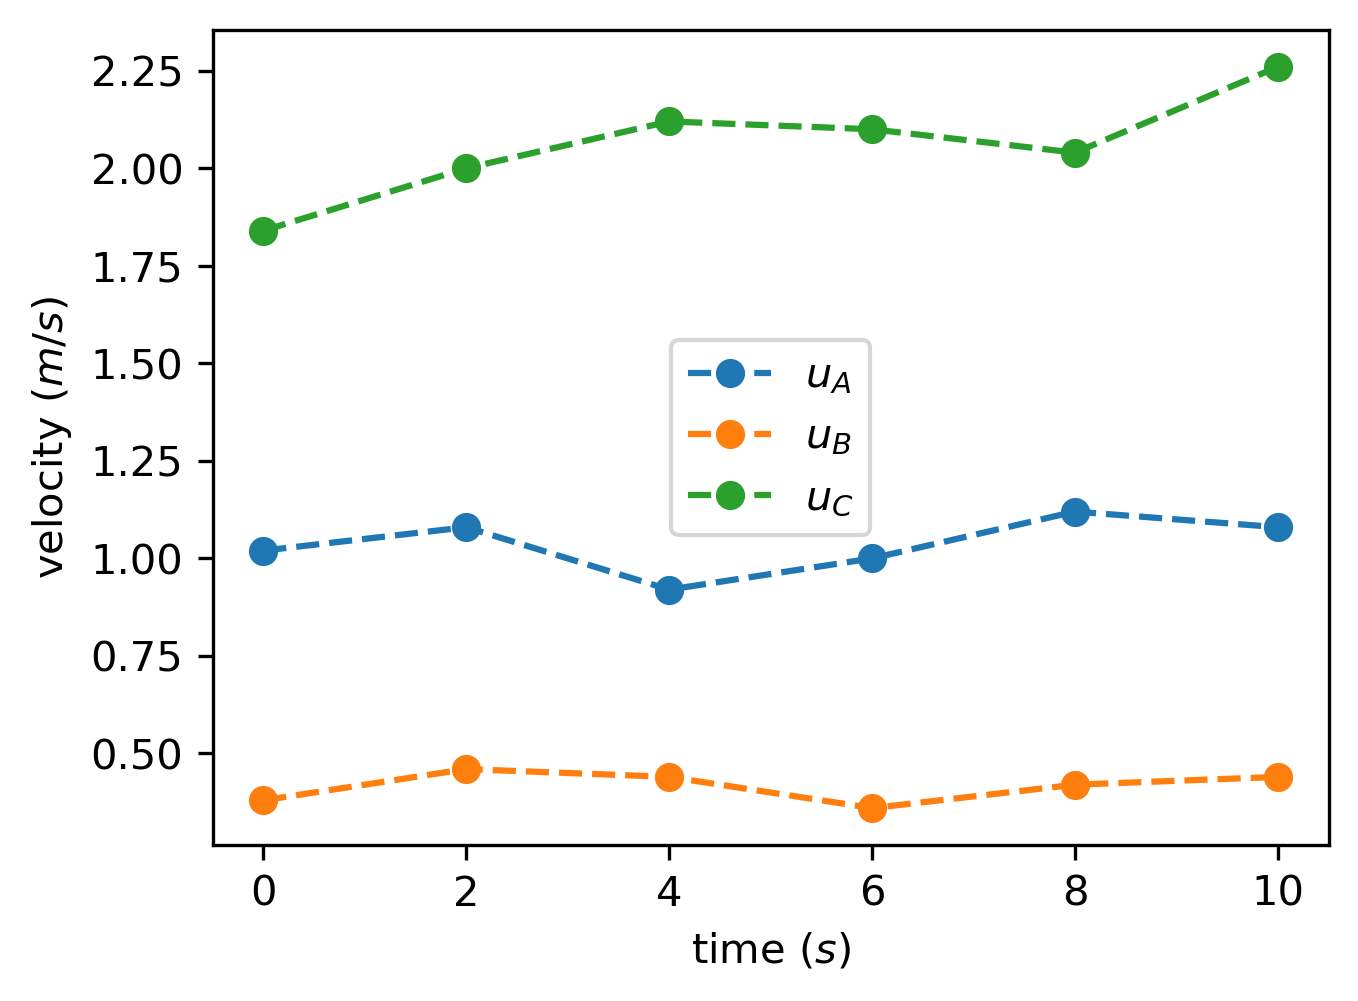

In [10]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;
#initial data
t=[0,2,4,6,8,10];
u=[[1.02,1.08,0.92,1.00,1.12,1.08],[0.38,0.46,0.44,0.36,0.42,0.44],[1.84,2.00,2.12,2.10,2.04,2.26]];
#let's plot what's going on
y_dummy=[1,2,3,4,5,6];
zeros=[0]*6; names=["A","B","C"];
x=[0,5,10];
for i in range(3):
    plt.plot(t,u[i],marker="o",linestyle="--",label=f"$u_{names[i]}$");
    ax=plt.gca();
    ax.set_xlabel("time $(s)$");
    ax.set_ylabel("velocity $(m/s)$");

plt.legend();
fig = plt.gcf();
fig.set_dpi(300);
fig.set_size_inches([4.8,3.6]);
plt.show();

Now to do the discrete time partial $\frac{\partial u}{\partial t}$ acceleration I do the difference as $ a(t_i)=\frac{u(t_{i+1})-u(t_{i})}{t_{i+1}-t_i} $

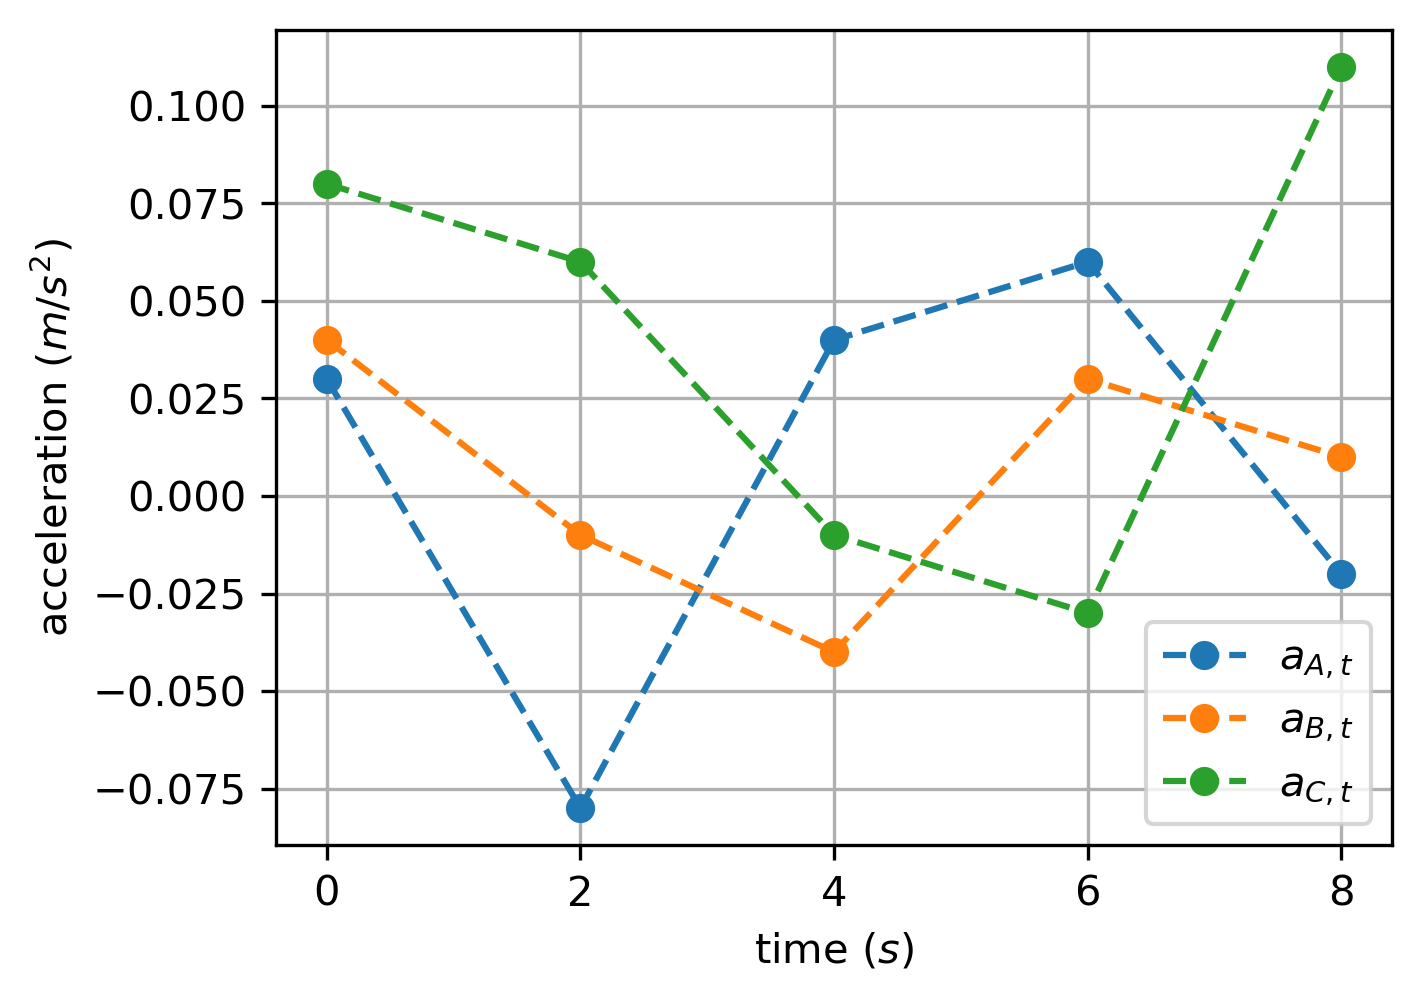

In [11]:
a=[]; 
tmid=[t[i] for i in range(5)];
plt.figure();
for ind in range(3):
    ai=[(u[ind][i+1]-u[ind][i])/(t[i+1]-t[i]) for i in range(5)];
    plt.plot(tmid,ai,marker="o",linestyle="--",label=f"$a_{{ {names[ind]} , t }}$");
    ax=plt.gca();
    ax.set_xlabel("time $(s)$");
    ax.set_ylabel("acceleration $(m/s^2)$");
    a.append(ai);

fig = plt.gcf();
fig.set_dpi(300);
fig.set_size_inches([4.8,3.6]);
plt.legend();
plt.grid();
plt.show();

and now for the "space" (convective/advective) acceleration $(V\cdot\nabla)V$, which in our one dimensional setting is equal to $a_x=u\frac{\partial u}{\partial x}$, I discretize as $a_x(x_i)=u(x_i)\left(\frac{u(x_{i+1})-u(x_i)}{x_{i+1}-x_i}\right)$

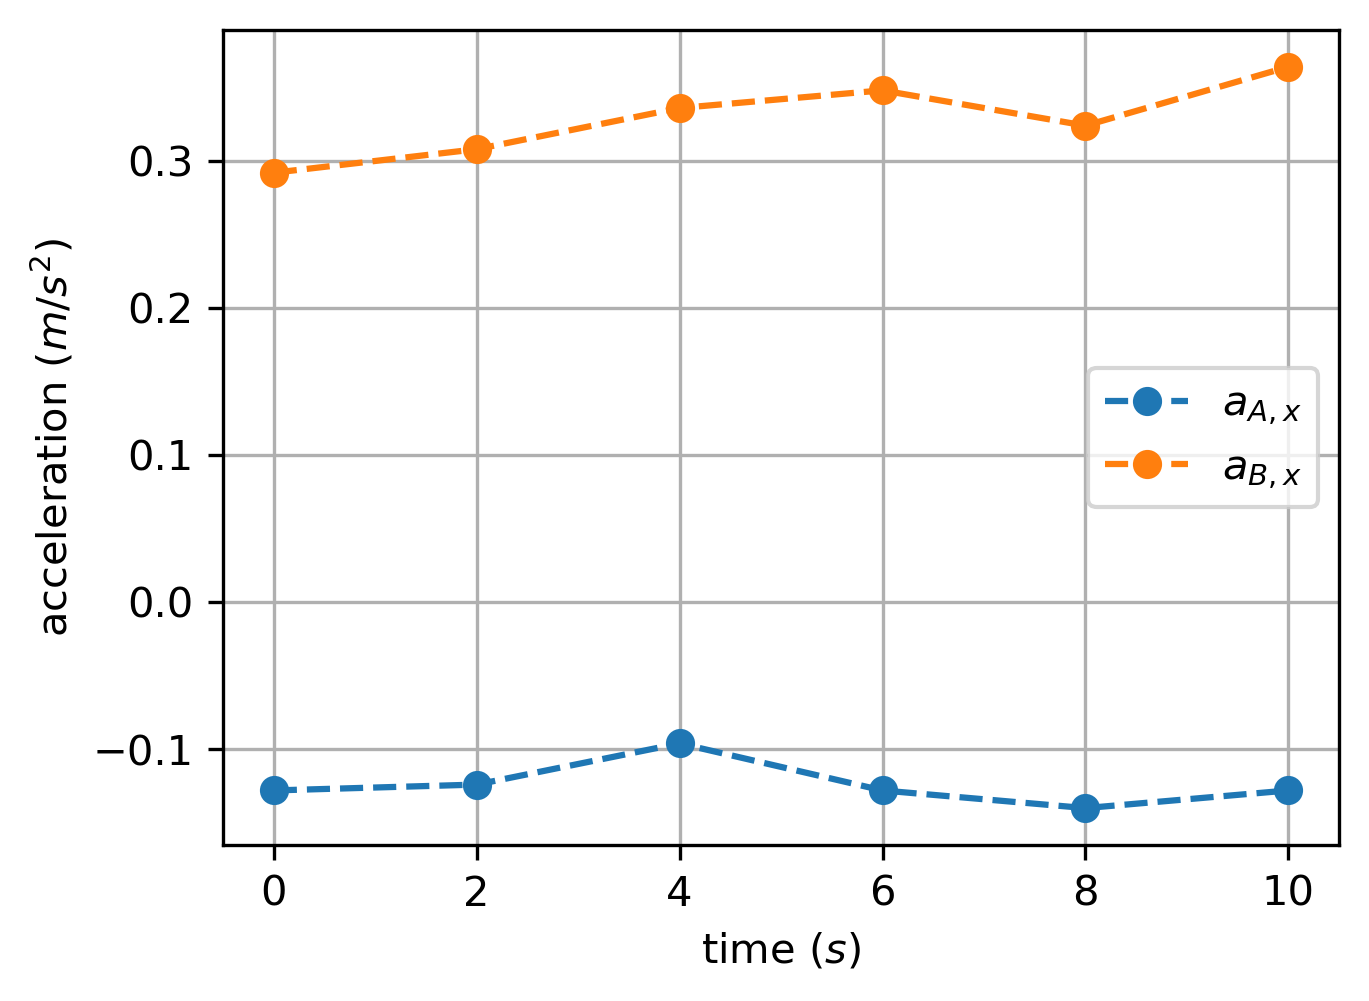

In [12]:
a_x=[];
xmid=[0,5];
plt.figure();
for i in range(2):
    axi=[(u[i+1][time]-u[i][time])/5 for time in range(6) ];
    a_x.append(axi);
    plt.plot(t,axi,marker="o",linestyle="--",label=f"$a_{{ {names[i]} , x }}$");    
    ax=plt.gca();
    ax.set_xlabel("time $(s)$");
    ax.set_ylabel("acceleration $(m/s^2)$");

fig = plt.gcf();
fig.set_dpi(300);
fig.set_size_inches([4.8,3.6]);
plt.legend();
plt.grid();
plt.show();    


Next, I find the max acceleration by finding the total derivative on locations $A$ and $B$ at times $t=0,2,4,6,8$ (discretizing using one sided derivatives takes away the one spatial and temporal dimension).

In [13]:
a_T=[];
for i in range(2):
    aux=[a[i][time]+a_x[i][time] for time in range(5)];
    a_T.append(aux);
print(a_T);

MAX_POS_ACC=max(max([a_T[i] for i in range(2)]));
MAX_NEG_ACC=min(min([a_T[i] for i in range(2)]));
print(f"maximum positive acceleration is {MAX_POS_ACC}");
print(f"maximum negative acceleration is {MAX_NEG_ACC}");


[[-0.09799999999999998, -0.20400000000000004, -0.05600000000000002, -0.06799999999999995, -0.16000000000000006], [0.33199999999999996, 0.298, 0.29600000000000004, 0.378, 0.334]]
maximum positive acceleration is 0.378
maximum negative acceleration is -0.20400000000000004


Finally, comparing them with gravity we see they are approximately $3.86\%$ and $2.08\%$ percent of gravity's acceleration 

In [ ]:
print( 100*MAX_POS_ACC/9.8);
print( -100*MAX_NEG_ACC/9.8);

### P4
Based on the fact that we only have averaged information and the conditions of no change in averaged channel width and depth, we will consider this as a one dimensional setting in the downstream direction. We will assume that the bed "migrates" at a constant speed $C$. Then, the one dimensional averaged relationship derived from Exner equation we worked in class is given by
$$\langle q_s \rangle = \varepsilon_b C\langle\eta\rangle +c.$$
Assuming spacial 